In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [2]:
PATH_TO_CSV = pathlib.Path('/home/relogu/Desktop/OneDrive/UNIBO/Magistrale/Federated Learning Project/ray_results')
FILENAMES_DICT = {
    'mnist': {
        'scheduler': {
            'sgd': 'mnist_sgd_lr.csv',
            'adam': 'mnist_adam_lr.csv',
            'yogi': 'mnist_yogi_lr.csv',
        },
        'no_scheduler': {
            'sgd': 'mnist_sgd_lr_nosched.csv',
            'adam': 'mnist_adam_lr_nosched.csv',
            'yogi': 'mnist_yogi_lr_nosched.csv',
        }
    },
    'bmnist': {
        'scheduler': {
            'sgd': 'bmnist_sgd_lr.csv',
            'adam': 'bmnist_adam_lr.csv',
            'yogi': 'bmnist_yogi_lr.csv',
        },
        'no_scheduler': {
            'sgd': 'bmnist_sgd_lr_nosched.csv',
            'adam': 'bmnist_adam_lr_nosched.csv',
            'yogi': 'bmnist_yogi_lr_nosched.csv',
        }
    },
}
COLORS_DICT = {
    'sgd': 'blue',
    'adam': 'orange',
    'yogi': 'green',
}
DATASET_DICT = {
    'mnist': '--',
    'bmnist': '-.',
}
LINEARS_DICT = {
    'dec': '--',
    'curves': '-.',
    'google': ':',
}
BATCH_DICT = {
    8: 'blue',
    16: 'orange',
    32: 'green',
    64: 'red',
}
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}
matplotlib.rc('font', **font)

Learning rate for each optimizer, for ``DEC`` architecture, with and without lr scheduler.
MNIST dataset

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


         lr  ray/tune/ae_loss  ray/tune/time_this_iter_s  ray/tune/done  \
0  0.000022          0.105691                   2.279438            1.0   
1  0.069232          0.021057                   2.290027            1.0   
2  0.001010          0.078691                   2.282388            1.0   
3  0.001196          0.072019                   2.329325            1.0   
4  0.363127          0.015410                   2.261585            1.0   

   ray/tune/time_since_restore  ray/tune/timesteps_since_restore dataset  \
0                   354.834259                               0.0   mnist   
1                   362.115509                               0.0   mnist   
2                    36.997631                               0.0   mnist   
3                    60.736496                               0.0   mnist   
4                   370.127563                               0.0   mnist   

       sched optimizer  
0  scheduler       sgd  
1  scheduler       sgd  
2  scheduler     

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


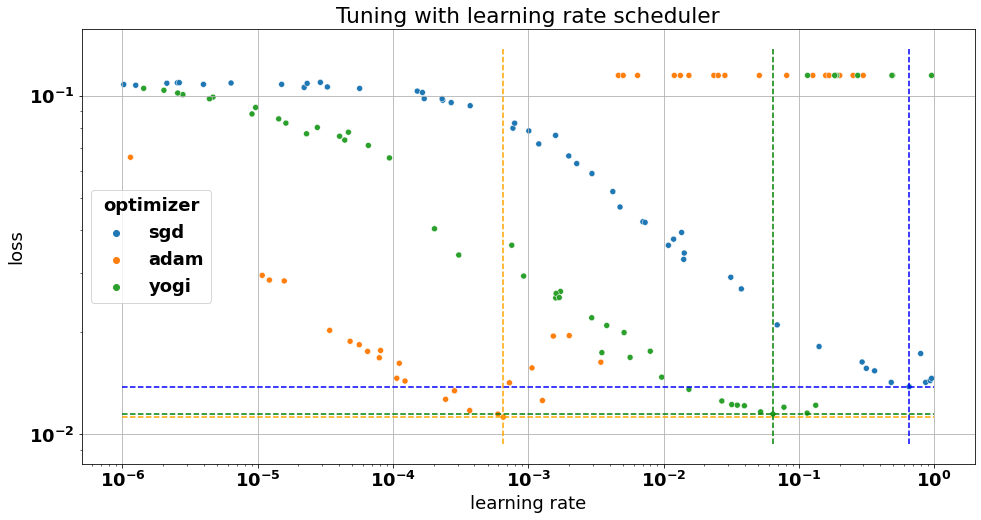

LR scheduler off
DATASET mnist, OPT adam, min loss 0.0122052887454628 at lr 0.0003499445174749
DATASET mnist, OPT sgd, min loss 0.01369050424546 at lr 0.4783828627529983
DATASET mnist, OPT yogi, min loss 0.0124692069366574 at lr 0.0368512701927668


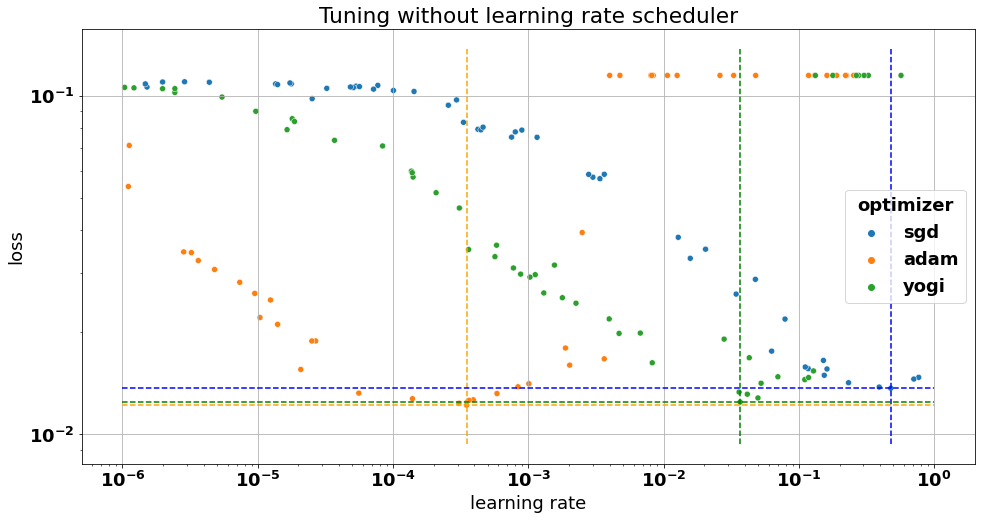

In [3]:
df = pd.DataFrame()
key = 'mnist'
# scheduler loop
for kkey in FILENAMES_DICT[key].keys():
    # optmizer loop
    for kkkey in FILENAMES_DICT[key][kkey].keys():
        if (PATH_TO_CSV/FILENAMES_DICT[key][kkey][kkkey]).exists():
            tmp = pd.read_csv(PATH_TO_CSV/FILENAMES_DICT[key][kkey][kkkey])
            tmp['dataset'] = key 
            tmp['sched'] = kkey 
            tmp['optimizer'] = kkkey
            df = df.append(tmp)
print(df.head())
mnist_best = pd.DataFrame()
columns = ['learning rate scheduler', 'optimizer', 'learning rate', 'final reconstruction loss']
print('LR scheduler on')
figure, ax = plt.subplots(1, 1, figsize=(16,8))
current = df[df['sched'] == 'scheduler']
sns.scatterplot(data=current, x='lr', y='ray/tune/ae_loss', ax=ax,
                style='dataset' if len(np.unique(current['dataset'])) > 1 else None,
                hue='optimizer' if len(np.unique(current['optimizer'])) > 1 else None,
                hue_order=list(COLORS_DICT.keys()),
                )

for dataset in np.unique(current['dataset']):
    for opt in np.unique(current['optimizer']):
        tmp = current[(current['optimizer'] == opt) & (current['dataset'] == dataset)]
        min_row = tmp.loc[tmp['ray/tune/ae_loss'].idxmin()]
        x = [min_row['lr'], min_row['lr']]
        y = [np.min(df['ray/tune/ae_loss'])/1.2, 1.2*np.max(df['ray/tune/ae_loss'])]
        ax.plot(x, y, color=COLORS_DICT[opt], linestyle=DATASET_DICT[dataset])
        x = [1e-6, 1]
        y = [np.min(tmp['ray/tune/ae_loss']), np.min(tmp['ray/tune/ae_loss'])]
        ax.plot(x, y, color=COLORS_DICT[opt], linestyle=DATASET_DICT[dataset])
        print('DATASET {}, OPT {}, min loss {} at lr {}'. \
            format(dataset, opt, np.min(tmp['ray/tune/ae_loss']), min_row['lr']))
        mnist_best = mnist_best.append(pd.DataFrame([[
            True,
            opt.upper(),
            min_row['lr'],
            np.min(tmp['ray/tune/ae_loss']),
            ]],
                                    columns=columns))
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()
ax.set_xlabel('learning rate')
ax.set_ylabel('loss')
ax.set_title('Tuning with learning rate scheduler')
plt.savefig('mnist_opt_lr_sched.png')
plt.show()

print('LR scheduler off')
# ax = axs[1]
figure, ax = plt.subplots(1, 1, figsize=(16,8))
current = df[df['sched'] == 'no_scheduler']
sns.scatterplot(data=current, x='lr', y='ray/tune/ae_loss', ax=ax,
                style='dataset' if len(np.unique(current['dataset'])) > 1 else None,
                hue='optimizer' if len(np.unique(current['optimizer'])) > 1 else None,
                hue_order=list(COLORS_DICT.keys()),
                )

for dataset in np.unique(current['dataset']):
    for opt in np.unique(current['optimizer']):
        tmp = current[(current['optimizer'] == opt) & (current['dataset'] == dataset)]
        min_row = tmp.loc[tmp['ray/tune/ae_loss'].idxmin()]
        x = [min_row['lr'], min_row['lr']]
        y = [np.min(df['ray/tune/ae_loss'])/1.2, 1.2*np.max(df['ray/tune/ae_loss'])]
        ax.plot(x, y, color=COLORS_DICT[opt], linestyle=DATASET_DICT[dataset])
        x = [1e-6, 1]
        y = [np.min(tmp['ray/tune/ae_loss']), np.min(tmp['ray/tune/ae_loss'])]
        ax.plot(x, y, color=COLORS_DICT[opt], linestyle=DATASET_DICT[dataset])
        print('DATASET {}, OPT {}, min loss {} at lr {}'. \
            format(dataset, opt, np.min(tmp['ray/tune/ae_loss']), min_row['lr']))
        mnist_best = mnist_best.append(pd.DataFrame([[
            False,
            opt.upper(),
            min_row['lr'],
            np.min(tmp['ray/tune/ae_loss']),
            ]],
                                    columns=columns))
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()
ax.set_xlabel('learning rate')
ax.set_ylabel('loss')
ax.set_title('Tuning without learning rate scheduler')
plt.savefig('mnist_opt_lr_nosched.png')
plt.show()
mnist_best.to_csv('mnist_opt_lr.csv')

Learning rate for each optimizer, for ``DEC`` architecture, with and without lr scheduler.
BMNIST dataset

         lr  ray/tune/ae_loss  ray/tune/time_this_iter_s  ray/tune/done  \
0  0.399860          0.026758                   2.304762            1.0   
1  0.000058          0.114877                   2.329576            1.0   
2  0.000334          0.096858                   2.284518            1.0   
3  0.000156          0.106360                   2.341189            1.0   
4  0.016313          0.046975                   2.284759            1.0   

   ray/tune/time_since_restore  ray/tune/timesteps_since_restore dataset  \
0                   429.494690                               0.0  bmnist   
1                   365.979858                               0.0  bmnist   
2                   359.208740                               0.0  bmnist   
3                   108.428490                               0.0  bmnist   
4                   359.709656                               0.0  bmnist   

       sched optimizer  
0  scheduler       sgd  
1  scheduler       sgd  
2  scheduler     

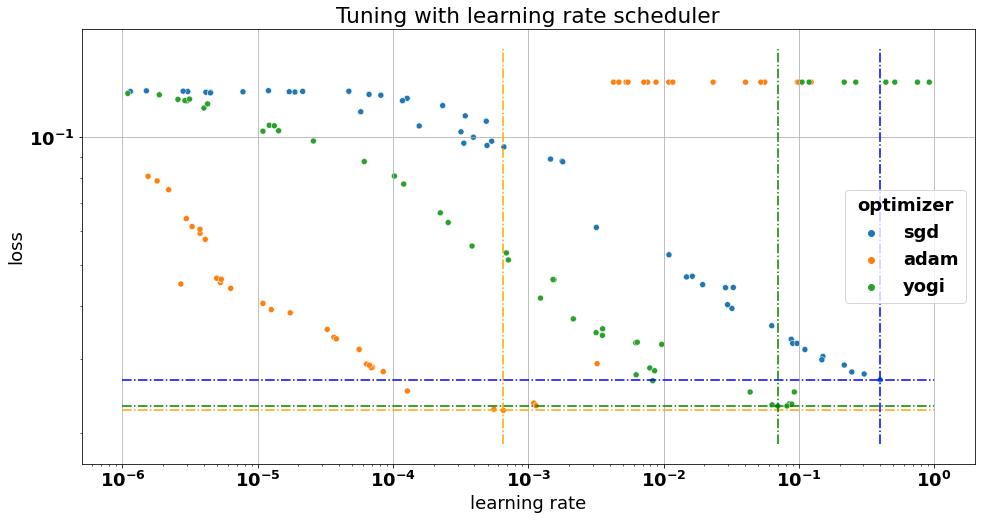

LR scheduler off
DATASET bmnist, OPT adam, min loss 0.024023288860917 at lr 0.0001515155651598
DATASET bmnist, OPT sgd, min loss 0.0243762210011482 at lr 0.7242621883558108
DATASET bmnist, OPT yogi, min loss 0.0247751902788877 at lr 0.0240627275036389


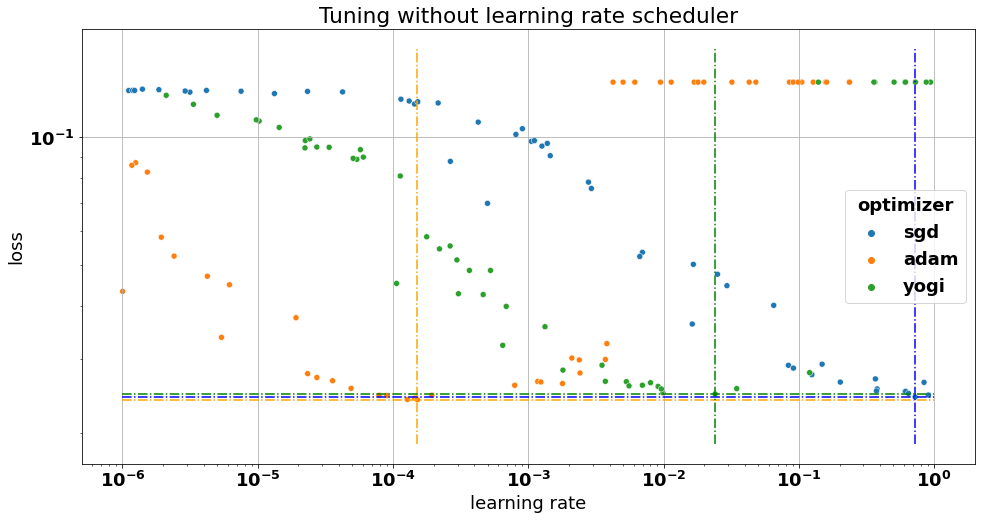

In [4]:
df = pd.DataFrame()
key = 'bmnist'
# scheduler loop
for kkey in FILENAMES_DICT[key].keys():
    # optmizer loop
    for kkkey in FILENAMES_DICT[key][kkey].keys():
        if (PATH_TO_CSV/FILENAMES_DICT[key][kkey][kkkey]).exists():
            tmp = pd.read_csv(PATH_TO_CSV/FILENAMES_DICT[key][kkey][kkkey])
            tmp['dataset'] = key 
            tmp['sched'] = kkey 
            tmp['optimizer'] = kkkey
            df = df.append(tmp)
print(df.head())
bmnist_best = pd.DataFrame()
columns = ['learning rate scheduler', 'optimizer', 'learning rate', 'final reconstruction loss']

print('LR scheduler on')
figure, ax = plt.subplots(1, 1, figsize=(16,8))
current = df[df['sched'] == 'scheduler']
sns.scatterplot(data=current, x='lr', y='ray/tune/ae_loss', ax=ax,
                style='dataset' if len(np.unique(current['dataset'])) > 1 else None,
                hue='optimizer' if len(np.unique(current['optimizer'])) > 1 else None,
                hue_order=list(COLORS_DICT.keys()),
                )

for dataset in np.unique(current['dataset']):
    for opt in np.unique(current['optimizer']):
        tmp = current[(current['optimizer'] == opt) & (current['dataset'] == dataset)]
        min_row = tmp.loc[tmp['ray/tune/ae_loss'].idxmin()]
        x = [min_row['lr'], min_row['lr']]
        y = [np.min(df['ray/tune/ae_loss'])/1.2, 1.2*np.max(df['ray/tune/ae_loss'])]
        ax.plot(x, y, color=COLORS_DICT[opt], linestyle=DATASET_DICT[dataset])
        x = [1e-6, 1]
        y = [np.min(tmp['ray/tune/ae_loss']), np.min(tmp['ray/tune/ae_loss'])]
        ax.plot(x, y, color=COLORS_DICT[opt], linestyle=DATASET_DICT[dataset])
        print('DATASET {}, OPT {}, min loss {} at lr {}'. \
            format(dataset, opt, np.min(tmp['ray/tune/ae_loss']), min_row['lr']))
        bmnist_best = bmnist_best.append(pd.DataFrame([[
            True,
            opt.upper(),
            min_row['lr'],
            np.min(tmp['ray/tune/ae_loss']),
            ]],
                                    columns=columns))
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()
ax.set_xlabel('learning rate')
ax.set_ylabel('loss')
ax.set_title('Tuning with learning rate scheduler')
plt.savefig('bmnist_opt_lr_sched.png')
plt.show()

print('LR scheduler off')
figure, ax = plt.subplots(1, 1, figsize=(16,8))
current = df[df['sched'] == 'no_scheduler']
sns.scatterplot(data=current, x='lr', y='ray/tune/ae_loss', ax=ax,
                style='dataset' if len(np.unique(current['dataset'])) > 1 else None,
                hue='optimizer' if len(np.unique(current['optimizer'])) > 1 else None,
                hue_order=list(COLORS_DICT.keys()),
                )

for dataset in np.unique(current['dataset']):
    for opt in np.unique(current['optimizer']):
        tmp = current[(current['optimizer'] == opt) & (current['dataset'] == dataset)]
        min_row = tmp.loc[tmp['ray/tune/ae_loss'].idxmin()]
        x = [min_row['lr'], min_row['lr']]
        y = [np.min(df['ray/tune/ae_loss'])/1.2, 1.2*np.max(df['ray/tune/ae_loss'])]
        ax.plot(x, y, color=COLORS_DICT[opt], linestyle=DATASET_DICT[dataset])
        x = [1e-6, 1]
        y = [np.min(tmp['ray/tune/ae_loss']), np.min(tmp['ray/tune/ae_loss'])]
        ax.plot(x, y, color=COLORS_DICT[opt], linestyle=DATASET_DICT[dataset])
        print('DATASET {}, OPT {}, min loss {} at lr {}'. \
            format(dataset, opt, np.min(tmp['ray/tune/ae_loss']), min_row['lr']))
        bmnist_best = bmnist_best.append(pd.DataFrame([[
            False,
            opt.upper(),
            min_row['lr'],
            np.min(tmp['ray/tune/ae_loss']),
            ]],
                                    columns=columns))
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()
ax.set_xlabel('learning rate')
ax.set_ylabel('loss')
ax.set_title('Tuning without learning rate scheduler')
plt.savefig('bmnist_opt_lr_nosched.png')
plt.show()
bmnist_best.to_csv('bmnist_opt_lr.csv')